## Well Log - Unsupervised Learning - Kmeans
- clustering is an unsupervised machine learning process which learns from the data itself rather than from labeled examples (supervised).
- It splits the data into distinct groups based on the features.
- methods: DBscan, Gaussean mixture modeling and Kmeans Clustering.
- the main objective of the Kmeans clustering algorithm is to reduce the sum of the distances between the center of the cluster and the other data points.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [10]:
df = pd.read_csv("/Users/andrewabello/Desktop/force2020_data_unsupervised_learning.csv", index_col = "DEPTH_MD")
df

# A well log is a detailed, continuous, and graphic record of geological formations penetrated by a borehole, measured against depth. 
# Depth is the natural ordering variable. Depth increases like time in time-series. So depth works like time in finance.

,RHOB,GR,NPHI,PEF,DTC
DEPTH_MD,,,,,
494.528,1.884186,80.200851,NaN,20.915468,161.131180
494.680,1.889794,79.262886,NaN,19.383013,160.603470
494.832,1.896523,74.821999,NaN,22.591518,160.173615
494.984,1.891913,72.878922,NaN,32.191910,160.149429
495.136,1.880034,71.729141,NaN,38.495632,160.128342
...,...,...,...,...,...
3271.416,2.630211,19.418915,0.187811,NaN,NaN
3271.568,2.643114,21.444370,0.185574,NaN,NaN
3271.720,2.681300,22.646879,0.176074,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18270 entries, 494.528 to 3272.024000000001
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RHOB    18270 non-null  float64
 1   GR      18270 non-null  float64
 2   NPHI    14032 non-null  float64
 3   PEF     16440 non-null  float64
 4   DTC     18189 non-null  float64
dtypes: float64(5)
memory usage: 856.4 KB


In [14]:
df.dropna(inplace= True) # drop null to keep things simple (Ytube)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12202 entries, 1138.704 to 2993.864
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RHOB    12202 non-null  float64
 1   GR      12202 non-null  float64
 2   NPHI    12202 non-null  float64
 3   PEF     12202 non-null  float64
 4   DTC     12202 non-null  float64
dtypes: float64(5)
memory usage: 572.0 KB


In [19]:
df.describe()

,RHOB,GR,NPHI,PEF,DTC
count,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000
mean,2.149947,61.253852,0.414572,3.912313,121.409905
std,0.251592,29.902708,0.139207,1.816933,30.394369
min,1.493417,6.191506,0.037976,1.126667,55.726753
25%,1.983767,42.792794,0.313797,2.629141,89.977041
50%,2.059335,62.886322,0.466891,3.365132,138.477173
75%,2.389839,77.726776,0.513840,4.686422,146.242302
max,2.889454,499.022583,0.800262,17.026619,163.910797


## Transform the Data
- it is best practice that to account for variations in measurement units and scale, we should standardize the data prior to machine learning.
- we standardizethe data using StandardScaler from SKlearn. (takes the feature (x1) and substracts it by the meanand then divided by the features standard deviation).
- KMeans works by: Minimizing the distance between points and cluster centroids. And the distance used is usually Euclidean distance. If your variables are on different scales, then the feature with the largest scale dominates the distance.
- The real difference is: Does the algorithm use distances or gradients, if distances (standardize) if gradients (not necessary).

In [23]:
scaler = StandardScaler()

df[["RHOB_T", "GR_T", "NPHI_T", "PEF_T", "DTC_T"]] = scaler.fit_transform(df[["RHOB", "GR", "NPHI", "PEF", "DTC"]])
df

# made new columns of the scaled features of the dataset.

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,GR_T,NPHI_T,PEF_T,DTC_T
DEPTH_MD,,,,,,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,-1.491843,-0.179292,2.523654,-1.255364,0.869531
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,-1.387067,-0.010859,2.770744,-1.247886,0.690042
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,-1.320646,0.028875,2.524300,-1.247450,0.554350
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,-1.274390,-0.008126,2.068584,-1.261572,0.585297
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,-1.335919,-0.092056,1.617342,-1.325067,0.752808
...,...,...,...,...,...,...,...,...,...,...
2993.256,2.468236,90.537521,0.341534,4.699200,86.474564,1.265151,0.979338,-0.524699,0.433103,-1.149449
2993.408,2.457519,88.819122,0.351085,4.699200,86.187599,1.222550,0.921870,-0.456081,0.433103,-1.158891
2993.560,2.429228,92.128922,0.364982,4.699200,87.797836,1.110101,1.032560,-0.356250,0.433103,-1.105910


## Clustering the data

### Identify the optimum number of clusters

In [34]:
# function to find optimal number of clusters (Elbow Method)
def optimise_k_means(data, max_k):
    
    means = []
    inertias = []

    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)

    # Generate the elbow plot
    plt.figure(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal k')
    plt.grid(True)
    plt.show()

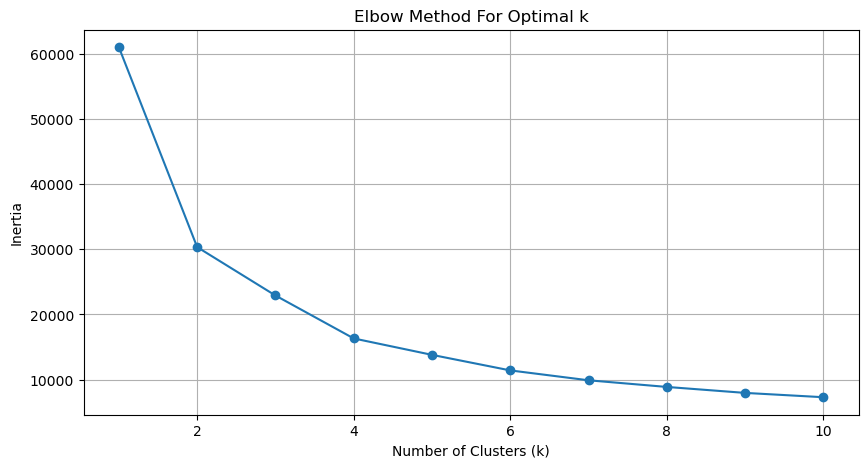

In [42]:
X = df[["RHOB_T", "GR_T", "NPHI_T", "PEF_T", "DTC_T"]]

optimise_k_means(X, 10)

# After looking at the elbow plot, we decide the optimal number of clusters (K) is 3

### Applying Kmeans Clustering

In [51]:
kmeans = KMeans(n_clusters= 3, random_state=42, n_init=10)
kmeans.fit(X)
df["KMeans_3"] = kmeans.labels_
df

# PCA is usually applied after clustering (for visualization).

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,GR_T,NPHI_T,PEF_T,DTC_T,KMeans_3
DEPTH_MD,,,,,,,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,-1.491843,-0.179292,2.523654,-1.255364,0.869531,0
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,-1.387067,-0.010859,2.770744,-1.247886,0.690042,0
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,-1.320646,0.028875,2.524300,-1.247450,0.554350,0
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,-1.274390,-0.008126,2.068584,-1.261572,0.585297,0
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,-1.335919,-0.092056,1.617342,-1.325067,0.752808,0
...,...,...,...,...,...,...,...,...,...,...,...
2993.256,2.468236,90.537521,0.341534,4.699200,86.474564,1.265151,0.979338,-0.524699,0.433103,-1.149449,1
2993.408,2.457519,88.819122,0.351085,4.699200,86.187599,1.222550,0.921870,-0.456081,0.433103,-1.158891,1
2993.560,2.429228,92.128922,0.364982,4.699200,87.797836,1.110101,1.032560,-0.356250,0.433103,-1.105910,1


### Analyze Cluster Proportions

In [102]:
df["KMeans_3"].value_counts(normalize=True)

# Cluster 0 dominates the well. Almost 2/3 of the data

KMeans_3
0    0.673988
2    0.186117
1    0.139895
Name: proportion, dtype: float64

### interpret Clusters

In [100]:
df.groupby("KMeans_3")[["RHOB", "GR", "NPHI", "PEF", "DTC"]].mean()
# We use scaled data for clustering, but we use original data for interpretation.
# Cluster 0 → High porosity sand
# Cluster 1 → Shale
# Cluster 2 → Dense rock (carbonate or tight sand)

,RHOB,GR,NPHI,PEF,DTC
KMeans_3,,,,,
0,1.999767,63.377435,0.497957,3.431096,140.509057
1,2.429492,101.089950,0.328202,5.208038,92.838214
2,2.483676,23.620841,0.177530,4.681014,73.721860


- KMeans with k=3 separated the formation into three lithological facies: high-porosity sands, shale intervals, and dense clean rock units, supported by a silhouette score of 0.55 and distinct log property averages.

### Plot Cluster vs Depth

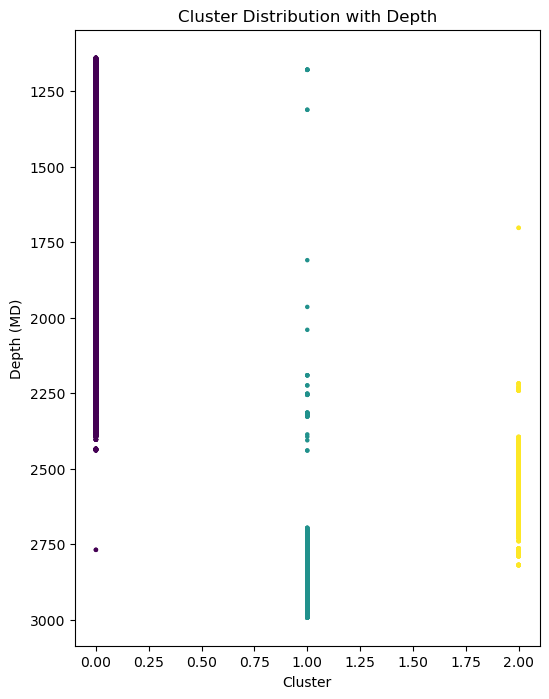

In [106]:
plt.figure(figsize=(6,8))

plt.scatter(
    df["KMeans_3"],
    df.index,
    c=df["KMeans_3"],
    cmap="viridis",
    s=5)

plt.gca().invert_yaxis()
plt.xlabel("Cluster")
plt.ylabel("Depth (MD)")
plt.title("Cluster Distribution with Depth")
plt.show()

# cluster 0: Mostly appears in shallower depths.
# cluster 1: Appears mostly in deeper sections.
# Cluster 2: Appears in a middle depth interval.

# we expect clusters to appear in continuous depth intervals, not randomly mixed. 
# KMeans is capturing geological layering.

## Principal Component Analysis
- why is it important: we clustered in 5 dimensions. But humans cannot visualize 5D, so PCA Keeps most of the structure, Lets you plot in 2D, and Helps you see cluster separation.

In [64]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # We want 2 principal components
X_pca = pca.fit_transform(X)

df["PC1"] = X_pca[:, 0] # all rows of first component
df["PC2"] = X_pca[:, 1] # all rows of second component

#### Check explained variance

In [67]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Explained:", sum(pca.explained_variance_ratio_))

# the ratio explains how much information each principal component keeps. PC1 explains 61% of variance. PC2 explains 19% of variance
# the total explained variance is 80%. very good 2D representation.

Explained Variance Ratio: [0.60802062 0.19375711]
Total Variance Explained: 0.8017777256012539


### Plot Clusters in PCA Space

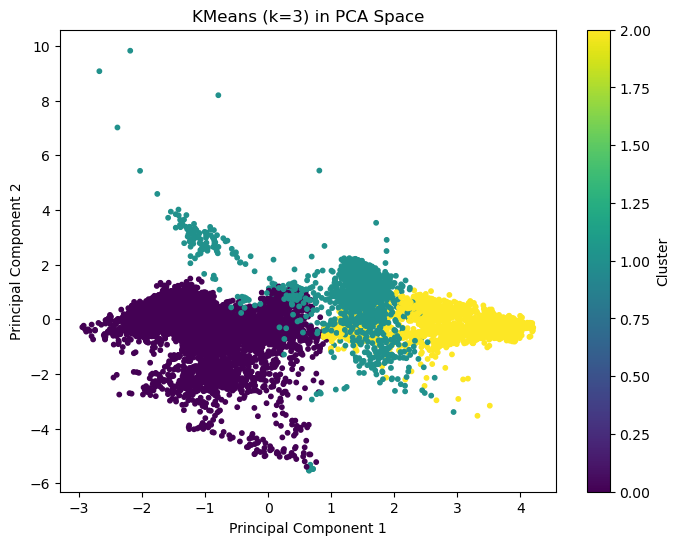

In [70]:
plt.figure(figsize=(8,6))

plt.scatter(
    df["PC1"],
    df["PC2"],
    c=df["KMeans_3"],
    cmap="viridis",
    s=10)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KMeans (k=3) in PCA Space")
plt.colorbar(label="Cluster")
plt.show()

# PCA keeps maximum variance, not maximum cluster separation.
# So clusters can look slightly overlapping in PCA even if they are well separated in 5D.

### Check Silhouette Score

In [75]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, df["KMeans_3"])
print("Silhouette Score:", score)

# The clustering structure is solid. ( > 0.5 is good)

Silhouette Score: 0.5490787516000305
